## Mobile Phone Recommendation System

### What is NLP?
>- NLP (Natural Language Processing) is a set of techniques for approaching text problems that enables computer programs and functions to understand human speech as it is spoken. 
>- Wr are using the bag of words approach as it takes common concepts from machine learning like feature engineering and model building and tweaks them only slightly.


### About the data...

<b>Context</b>

The dataset contains approx. 400,000 reviews of unlocked mobile phones sold on Amazon.com to find out insights with respect to reviews, ratings, price and their relationships.

<b>Data</b>

Following fields are available in this dataset:

>- Product Title
>- Brand name
>- Price
>- Rating
>- Review text
>- Review Votes


Data was extracted in December, 2016 from the unlocked mobile category of Amazon.com.

In [14]:
import os,sys
import pandas as pd
import numpy as np
import pandas as pd

#importing for plotting the graphs 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Download NLP Toolkit for 
import nltk 

#using Beautiful Soup for filtering Html tags
from bs4 import BeautifulSoup

# using crossvalidation for splitting data into training and test data
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split 

# Import the stop word list and text data sets, including stop words
from nltk.corpus import stopwords
#'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're",
from nltk.tokenize import WordPunctTokenizer


In [2]:
#Reading the dataset using the "read_csv" function to read the labeled data

amazondata = pd.read_csv("D:/MIT/Semester2/Machine Learning/Final Project/Recommender_Systems_Amazon-master/Amazon_Unlocked_Mobile.csv", 
                         header=0,error_bad_lines=False)

print (amazondata.head())

                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  
0       5  I feel so LUCKY to have found this used (phone...           1.0  
1       4  nice phone, nice up grade from my pantach revu...           0.0  
2       5                                       Very pleased           0.0  
3       4  It works good but it goes slow sometimes but i...           0.0  
4       4  Great phone to replace my lost phone. The only...           0.0  


In [110]:
product_name = []
for item in amazondata["Product Name"]:
    if (item in product_name):
        continue
    else:
        product_name.append(item)

print(len(product_name))

4410


##### There are 4410 phone models in this data set

In [115]:
brands = []
for item in amazondata["Brand Name"]:
    if (item in brands):
        continue
    else:
        brands.append(item)
        
print(len(brands))

385


##### There are 385 brands in this data set.

In [3]:
#identifying the number of rows and columns present in the data

amazondata.shape

(413840, 6)

In [116]:
# Creating a DataFrame by passing the dataset object to be converted to series-like for data-cleaning and
# pre-processsing
amazondata_df = pd.DataFrame(amazondata)

print(amazondata_df.head(10))

                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
5  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
6  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
7  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
8  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
9  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  
0       5  I feel so LUCKY to have found this used (phone...           1.0  
1       4  nice phon

### Data Cleaning and Text Preprocessing/Analysis

First, we'll remove the HTML tags. For this purpose, we'll use the Beautiful Soup library. 

In [145]:
import warnings
warnings.filterwarnings('ignore')

amazondata_df = amazondata_df[pd.notnull(amazondata_df['Reviews'])] 

amazondata_df['Review Votes'].replace("", 0, inplace=True )

amazondata_df['Brand Name'] = amazondata_df.ix[~(amazondata_df['Brand Name'] == "")]

In [6]:
#check if we have any null reviews in our dataframe after the data cleaning
amazondata_df['Reviews'].isnull().any()

False

In [27]:
#reset_index to drop the existing index and replace with new index

amazondata_df.reset_index(drop=True, inplace=True)

In [117]:
#displaying the data with new index

print (amazondata_df.head(10))

                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
5  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
6  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
7  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
8  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
9  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  
0       5  I feel so LUCKY to have found this used (phone...           1.0  
1       4  nice phon

##### Top 10 brands in the data set sorted on the basis of sum of Ratings.

In [118]:
info = pd.pivot_table(amazondata_df,index=['Brand Name'],values=['Rating', 'Review Votes'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
info = info.sort_values(by=('sum', 'Rating'), ascending = False)

info.head(10)

sum                   mean             
            Rating Review Votes    Rating Review Votes
Brand Name                                            
Samsung     260513        97903  3.962356     1.530069
BLU         239853        58430  3.792262     0.952792
Apple       228346       112280  3.924415     1.998149
LG           86114        23070  3.841460     1.061178
Nokia        64187        25964  3.819291     1.600148
BlackBerry   63126        21114  3.741465     1.279326
Motorola     51157        23107  3.812849     1.777051
HTC          44094        12803  3.465420     1.035506
CNPGD        39176        20151  3.106002     1.638026
OtterBox     35022         2276  4.383778     0.288759

#### CoRelation between price & rating

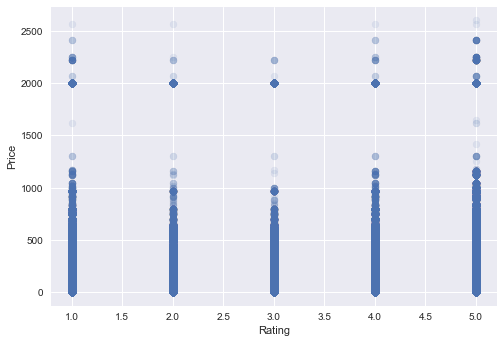

In [119]:
import matplotlib.pyplot as plt

ylabel = amazondata_df["Price"]
plt.ylabel("Price")
plt.xlabel("Rating")
xlabel = amazondata_df["Rating"]
plt.scatter(xlabel, ylabel, alpha=0.1)
plt.show()

#### CoRelation between Price and Review Votes

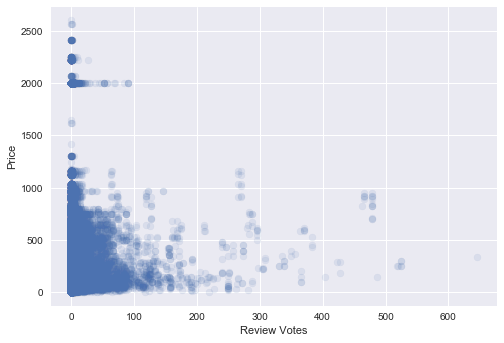

In [120]:
ylabel2 = amazondata_df["Price"]
plt.ylabel("Price")
xlabel2 = amazondata_df["Review Votes"]
plt.xlabel("Review Votes")
plt.scatter(xlabel2, ylabel2, alpha=0.1)
plt.show()

#### Strong co-relation between review votes and price.

#### CoRelation between Rating and Review Votes

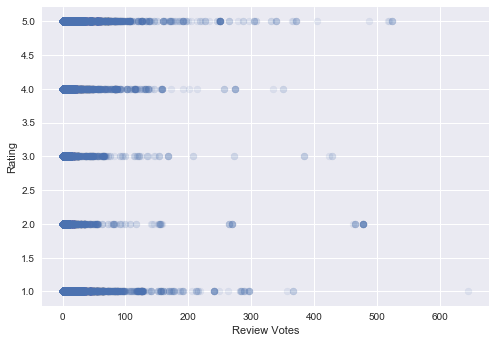

In [121]:
ylabel3 = amazondata_df["Rating"]
plt.ylabel("Rating")
xlabel3 = amazondata_df["Review Votes"]
plt.xlabel("Review Votes")
plt.scatter(xlabel3, ylabel3, alpha=0.1)
plt.show()

In [122]:
corr_matrix = amazondata_df.corr()
corr_matrix["Rating"].sort_values(ascending = False)

Rating          1.000000
Price           0.074767
Review Votes   -0.050303
Name: Rating, dtype: float64

#### It is observed that Rating has a NEGATIVE CORRELATION with Review Votes = -0.050303

In [123]:
corr_matrix = amazondata_df.corr()
corr_matrix["Price"].sort_values(ascending = False)

Price           1.000000
Rating          0.074767
Review Votes    0.021903
Name: Price, dtype: float64

#### It is observed that Rating has a POSITIVE CORRELATION with Price = 0.073948

## Questions to our dataset...

>- #### Can we predict the rating and preference that a user will give to a particular product based on the existing data

>- #### Find out how many reviews, ratings, and product name in the dataset are similar to the given keyword.

In [29]:
amazon_train, amazon_test =  cross_validation.train_test_split(amazondata_df, test_size = .2, random_state=0)

In [34]:
import warnings
warnings.filterwarnings('ignore')

reviews_train = []

#coverting all the data within the review column to string datatypes
amazon_train['Reviews'] = amazon_train['Reviews'].astype(str)


In [35]:
#reset_index to drop the existing index and replace with new index

amazon_train.reset_index(drop=True, inplace=True)

In [93]:
#using BeautifulSoup to remove all the html tags that might be present in the review column of the amazon_train dataframe
for i in range (0,len(amazon_train)):
   reviews_train.append(BeautifulSoup(amazon_train["Reviews"][i],"lxml").get_text())

In [94]:
print(reviews_train[1])

was mot for me my brother says it is good but does not work with Verizon you need to tell more about the products you sell so everyone knows just what they are buying


#### NLTK function to find sentiment value and sentiment.

In [100]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentiment_value(paragraph):
    analyser = SentimentIntensityAnalyzer()
    result = analyser.polarity_scores(paragraph)
    score = result['compound']
    return round(score,1)

In [101]:
sample = amazon_train['Reviews'][50]
print(sample)
print('Sentiment: ')
print(sentiment_value(sample))

Beautiful phone 😍, no noticeable scratches , no dents. Thought this was too cheap to be good but its amazing !! I would buy it again.
Sentiment: 
0.8


In [105]:
all_sent_values = []
all_sentiments = []

In [111]:
#for i in range(0,20000):
for i in range(0,len(amazon_train['Reviews'])): 
    all_sent_values.append(sentiment_value(reviews_train[i])) # 8 minutes for calculation
    

In [124]:
len(all_sent_values)

539699

In [126]:
#Sentiment Analysis on first 20,000 rows
temp_data = amazondata_df[0:len(amazon_train['Reviews'])]

#### Intervals
#### [ -1, -0.5) : 1, V.Negative
#### [-0.5, 0) : 2, Negative
#### [0] : 3, Neutral
#### (0, 0.5) : 4, Positive
#### [0.5, 1] : 5, V.Positive

In [127]:
SENTIMENT_VALUE = []
SENTIMENT = []
for i in range(0,len(amazon_train['Reviews'])):
    sent = all_sent_values[i]
    if (sent<=1 and sent>=0.5):
        SENTIMENT.append('V.Positive')
        SENTIMENT_VALUE.append(5)
    elif (sent<0.5 and sent>0):
        SENTIMENT.append('Positive')
        SENTIMENT_VALUE.append(4)
    elif (sent==0):
        SENTIMENT.append('Neutral')
        SENTIMENT_VALUE.append(3)
    elif (sent<0 and sent>=-0.5):
        SENTIMENT.append('Negative')
        SENTIMENT_VALUE.append(2)
    else:
        SENTIMENT.append('V.Negative')
        SENTIMENT_VALUE.append(1)
        
        

In [128]:
temp_data['SENTIMENT_VALUE'] = SENTIMENT_VALUE
temp_data['SENTIMENT'] = SENTIMENT

In [129]:
temp_data.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,SENTIMENT_VALUE,SENTIMENT
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,2,Negative
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,4,Positive
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,4,Positive
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,5,V.Positive
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,4,Positive
5,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I already had a phone with problems... I know ...,1.0,5,V.Positive
6,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,The charging port was loose. I got that solder...,0.0,3,Neutral
7,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,"Phone looks good but wouldn't stay charged, ha...",0.0,1,V.Negative
8,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I originally was using the Samsung S2 Galaxy f...,0.0,3,Neutral
9,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,It's battery life is great. It's very responsi...,0.0,4,Positive


### Accuracy

In [130]:
#find accuracy
counter = 0
for i in range(0,len(amazon_train['Reviews'])):
    if (abs(temp_data['Rating'][i]-temp_data['SENTIMENT_VALUE'][i])>1):
        counter += 1
    
print(counter)

142479


#### 142479 occurences where Rating and Sentiment differ by more than 1.

In [131]:
accuracy = (temp_data.shape[0]-counter)/temp_data.shape[0]

percent_accuracy = accuracy*100

print(percent_accuracy)


56.95784570209835


#### 57% equal values of Rating and Sentiment Values (+/- 1)

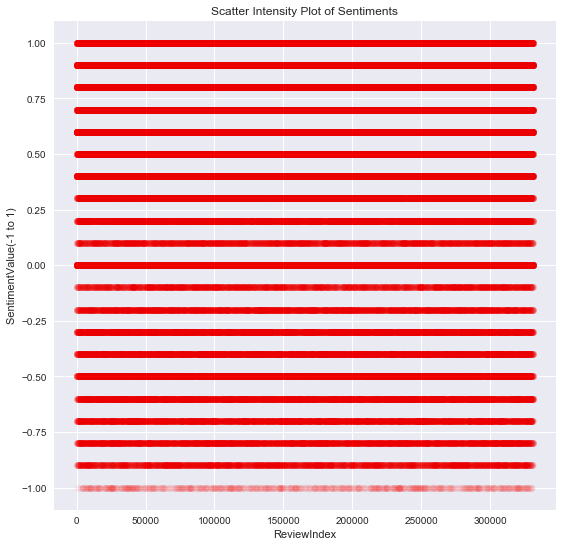

In [132]:
xaxis = []
for i in range(0,len(amazon_train['Reviews'])):
    xaxis.append(i)

ylabel_new_1 = all_sent_values[:len(amazon_train['Reviews'])]

xlabel = xaxis
plt.figure(figsize=(9,9))
plt.xlabel('ReviewIndex')
plt.ylabel('SentimentValue(-1 to 1)')
plt.plot(xlabel, ylabel_new_1, 'ro',  alpha=0.04)

plt.title('Scatter Intensity Plot of Sentiments')
plt.show()

#### Observation: Sentiment variation is concentrated towards positivity.

In [134]:
product_name = []
for item in temp_data["Product Name"]:
    if (item in product_name):
        continue
    else:
        product_name.append(item)
        
len(product_name)

3318

#### 3318 brands in the set.

In [135]:
testing2 = pd.pivot_table(temp_data,index=['Brand Name'],values=['Rating', 'Review Votes','SENTIMENT_VALUE'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
testing2 = testing2.sort_values(by=('sum', 'Rating'), ascending = False)
testing2.head(10)

sum                                   mean               \
            Rating Review Votes SENTIMENT_VALUE    Rating Review Votes   
Brand Name                                                               
BLU         233635        55066          242959  3.813889     0.926912   
Apple       227836       111979          230705  3.924553     1.997129   
Samsung      97892        41486           98228  3.955073     1.726138   
LG           78720        21259           81333  3.853534     1.074012   
Nokia        64163        25948           66614  3.819681     1.599951   
BlackBerry   62931        20885           66512  3.745670     1.270918   
Motorola     49888        22520           51760  3.828409     1.781928   
HTC          43383        12472           49642  3.479548     1.029978   
CNPGD        39176        20151           50132  3.106002     1.638026   
OtterBox     35022         2276           31645  4.383778     0.288759   

                            
           SENTIMENT_VALUE  
Brand Name                  
BLU               3.966095  
Apple             3.973973  
Samsung           3.968648  
LG                3.981447  
Nokia             3.965591  
BlackBerry        3.958812  
Motorola          3.972067  
HTC               3.981553  
CNPGD             3.974629  
OtterBox          3.961071

#### Top 10 Brand names.
#### BLU
#### Apple
#### Samsung
#### LG
#### Nokia
#### BlackBerry
#### Motorola
#### HTC
#### CNPGD
#### OtterBox

#### Rating and Sentiment Value data are accurate with respect to each other.

In [138]:
#Top Phone Models

testing3 = pd.pivot_table(temp_data,index=['Product Name'],values=['Rating', 'Review Votes','SENTIMENT_VALUE'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
testing3 = testing3.sort_values(by=('sum', 'Rating'), ascending = False)
testing3.head(10)

sum               \
                                                   Rating Review Votes   
Product Name                                                             
BLU Studio 5.0 C HD Unlocked Cellphone, Black        5030          772   
Motorola Moto E (1st Generation) - Black - 4 GB...   4980         1046   
Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP ...   4975         2204   
Motorola Moto E (1st Generation) - Black - 4 GB...   4664          937   
OtterBox Iphone 5/5S/SE Defender Case w/ Drop a...   4488          320   
Huawei Mate 2 - Factory Unlocked (Black)             4479         2709   
Apple iPhone 5s 32GB (Silver) - AT&T                 4460         1557   
Apple iPhone 5s AT&T Cellphone, 16GB, Silver         4267         1315   
BLU Energy X Plus Smartphone - With 4000 mAh Su...   4213          712   
Apple MF259LL/A - iPhone 4s 8GB / 8MP Camera - ...   4188         1893   

                                                                        mean  \
                                                   SENTIMENT_VALUE    Rating   
Product Name                                                                   
BLU Studio 5.0 C HD Unlocked Cellphone, Black                 4724  4.212730   
Motorola Moto E (1st Generation) - Black - 4 GB...            4442  4.418811   
Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP ...            5856  3.428670   
Motorola Moto E (1st Generation) - Black - 4 GB...            4216  4.412488   
OtterBox Iphone 5/5S/SE Defender Case w/ Drop a...            4427  3.975199   
Huawei Mate 2 - Factory Unlocked (Black)                      4015  4.452286   
Apple iPhone 5s 32GB (Silver) - AT&T                          4397  3.989267   
Apple iPhone 5s AT&T Cellphone, 16GB, Silver                  4380  3.950926   
BLU Energy X Plus Smartphone - With 4000 mAh Su...            4408  3.792079   
Apple MF259LL/A - iPhone 4s 8GB / 8MP Camera - ...            4906  3.374698   

                                                                 \
                                                   Review Votes   
Product Name                                                      
BLU Studio 5.0 C HD Unlocked Cellphone, Black          0.688057   
Motorola Moto E (1st Generation) - Black - 4 GB...     0.978485   
Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP ...     1.617021   
Motorola Moto E (1st Generation) - Black - 4 GB...     0.966976   
OtterBox Iphone 5/5S/SE Defender Case w/ Drop a...     0.286996   
Huawei Mate 2 - Factory Unlocked (Black)               3.033595   
Apple iPhone 5s 32GB (Silver) - AT&T                   1.468868   
Apple iPhone 5s AT&T Cellphone, 16GB, Silver           1.312375   
BLU Energy X Plus Smartphone - With 4000 mAh Su...     0.668545   
Apple MF259LL/A - iPhone 4s 8GB / 8MP Camera - ...     1.598818   

                                                                    
                                                   SENTIMENT_VALUE  
Product Name                                                        
BLU Studio 5.0 C HD Unlocked Cellphone, Black             3.956449  
Motorola Moto E (1st Generation) - Black - 4 GB...        3.941437  
Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP ...        4.035837  
Motorola Moto E (1st Generation) - Black - 4 GB...        3.988647  
OtterBox Iphone 5/5S/SE Defender Case w/ Drop a...        3.921169  
Huawei Mate 2 - Factory Unlocked (Black)                  3.991054  
Apple iPhone 5s 32GB (Silver) - AT&T                      3.932916  
Apple iPhone 5s AT&T Cellphone, 16GB, Silver              4.055556  
BLU Energy X Plus Smartphone - With 4000 mAh Su...        3.967597  
Apple MF259LL/A - iPhone 4s 8GB / 8MP Camera - ...        3.953263

#### Sum and Mean Plots of Rating with Sentiments.

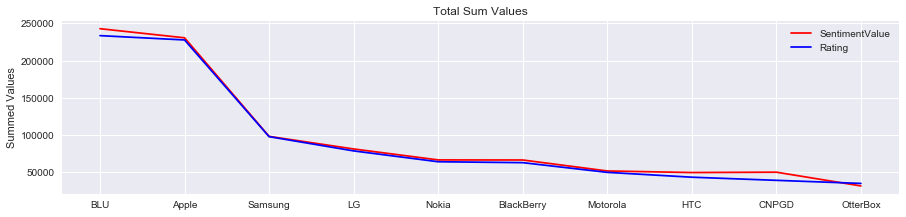

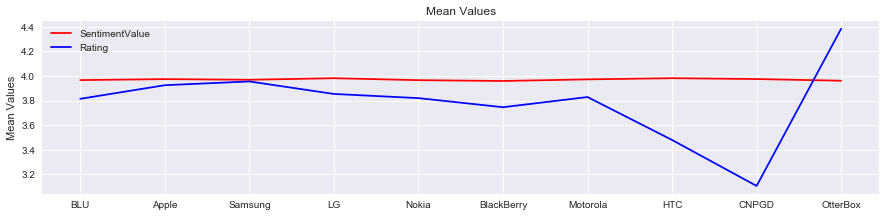

In [139]:
import pylab

names = testing2.index[:10]
y = testing2['sum', 'SENTIMENT_VALUE'][:10]
y2 = testing2['sum', 'Rating'][:10]


pylab.figure(figsize=(15,7))
x = range(10)
pylab.subplot(2,1,1)
pylab.xticks(x, names)
pylab.ylabel('Summed Values')
pylab.title('Total Sum Values')
pylab.plot(x,y,"r-",x,y2,'b-')
pylab.legend(['SentimentValue', 'Rating'])

y_new = testing2['mean', 'SENTIMENT_VALUE'][:10]
y2_new = testing2['mean', 'Rating'][:10]


pylab.figure(figsize=(15,7))


pylab.subplot(2,1,2)
pylab.xticks(x, names)
pylab.ylabel('Mean Values')
pylab.title('Mean Values')
pylab.plot(x,y_new,"r-",x,y2_new,'b-')
pylab.legend(['SentimentValue', 'Rating'])


pylab.show()

In [141]:
#Sentiment Analysis For Top 5 brands

blu = []
apple = []
samsung = []
lg = []
nokia = []



for i in range(0,len(amazon_train['Reviews'])):
    score = all_sent_values[i]
    brand = temp_data['Brand Name'][i]
    if (brand == 'BLU'):
        blu.append(score)
    elif (brand == 'Apple'):
        apple.append(score)
    elif (brand == 'Samsung'):
        samsung.append(score)
    elif (brand == 'LG'):
        lg.append(score)
    elif (brand == 'Nokia'):
        nokia.append(score)
    else:
        continue

In [142]:
list_of_brands = [blu,apple,samsung,lg,nokia]
name_of_brands = ['BLU', 'Apple', 'Samsung', 'LG', 'Nokia']

In [143]:
def plot_brand(brand, name):
    pylab.figure(figsize=(20,3))
    x = range(0,800)
    
    #pylab.xticks(x)
    pylab.ylabel('Sentiment')
    pylab.title(name)
    #pylab.plot(x,brand,"ro", alpha = 0.2)
    pylab.plot(x, brand[:800], color='#4A148C', linestyle='none', marker='o',ms=9, alpha = 0.4)
    
    pylab.show()

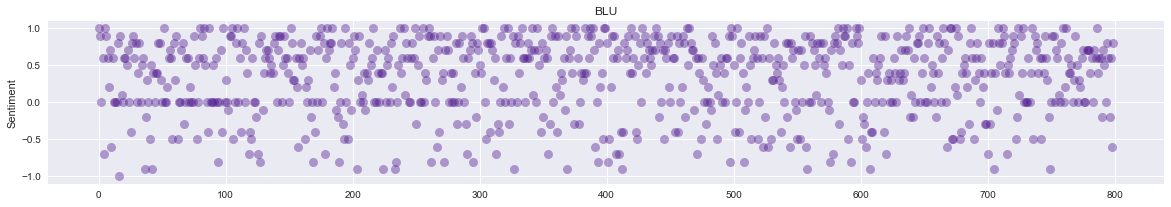

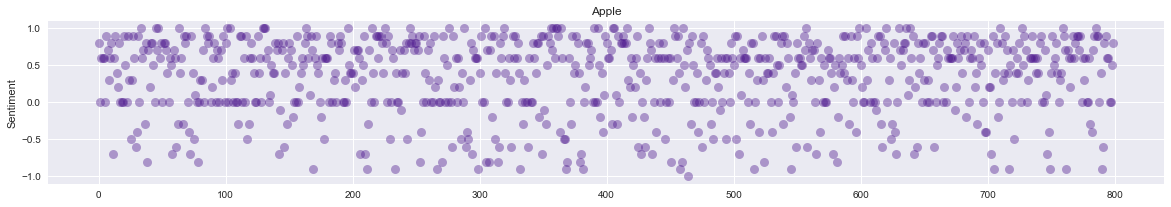

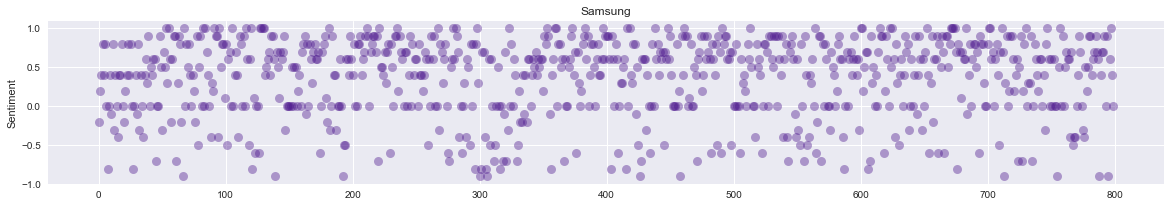

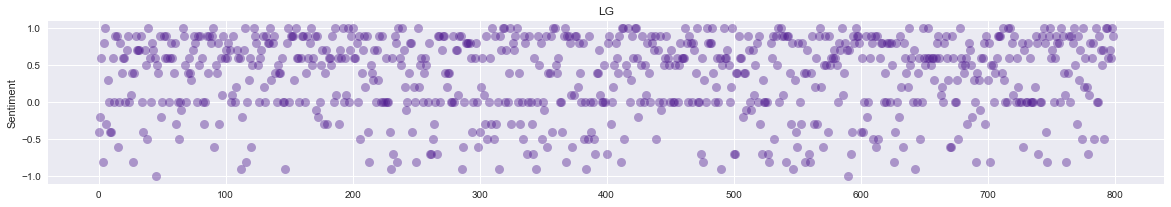

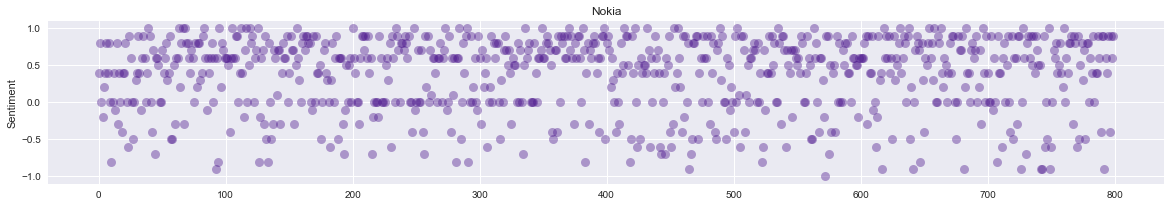

In [144]:
for i in range(0,len(list_of_brands)):
    plot_brand(list_of_brands[i],name_of_brands[i])

### Observation :
>- Sentiment concentration towards positivity decreases as we move from top to lower brands.


>- Population towards negativity and neutrality keeps on increasing as we move downwards.

### Limitations

>- Vocabulary: The vocabulary requires careful design, most specifically in order to manage the size, which impacts the sparsity of the document representations.

>- Missing values: We do not have all the values for Price, Reviews and Review Votes.

### References

https://data.world/promptcloud/amazon-mobile-phone-reviews

http://www.rroij.com/open-access/text-mining-concepts-process-and-applications-36-39.pdf

http://blog.aylien.com/10-common-nlp-terms-explained-for-the-text/

https://machinelearningmastery.com/gentle-introduction-bag-words-model/

http://textminingonline.com/dive-into-nltk-part-i-getting-started-with-nltk

https://stackoverflow.com/questions/1833252/java-stanford-nlp-part-of-speech-labels
